In [1]:
import nltk

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download("punkt")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\msi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\msi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\msi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
import pandas as pd

In [3]:
train_df = pd.read_csv("./data/train.csv", encoding="ISO-8859-1")
test_df = pd.read_csv("./data/test.csv", encoding="ISO-8859-1")

In [4]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


## Exploratory Data Analysis (EDA)


In [5]:
train_df.info()
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


<Axes: title={'center': 'Attributes NULL Values'}>

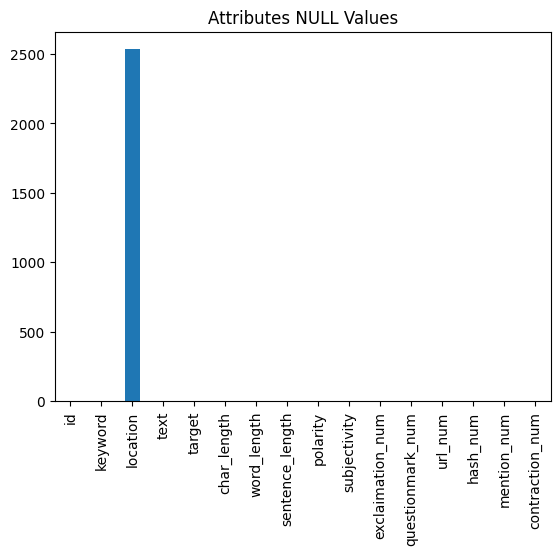

In [29]:
train_df.isnull().sum().plot(kind='bar', title="Attributes NULL Value")

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import spacy

nlp = spacy.load("en_core_web_sm")  #tokenizer

print(train_df.head())

train_df['char_length'] = train_df.text.str.len()
train_df["word_length"] = train_df.text.apply(lambda text: len([token.text for token in nlp(text)]))
train_df["sentence_length"] = train_df.text.apply(lambda text: len(list(nlp(text).sents)))
# train_df.head()


   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  


In [8]:
train_df.head()

,id,keyword,location,text,target,char_length,word_length,sentence_length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,14,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,8,2
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,25,2
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,9,1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,18,1


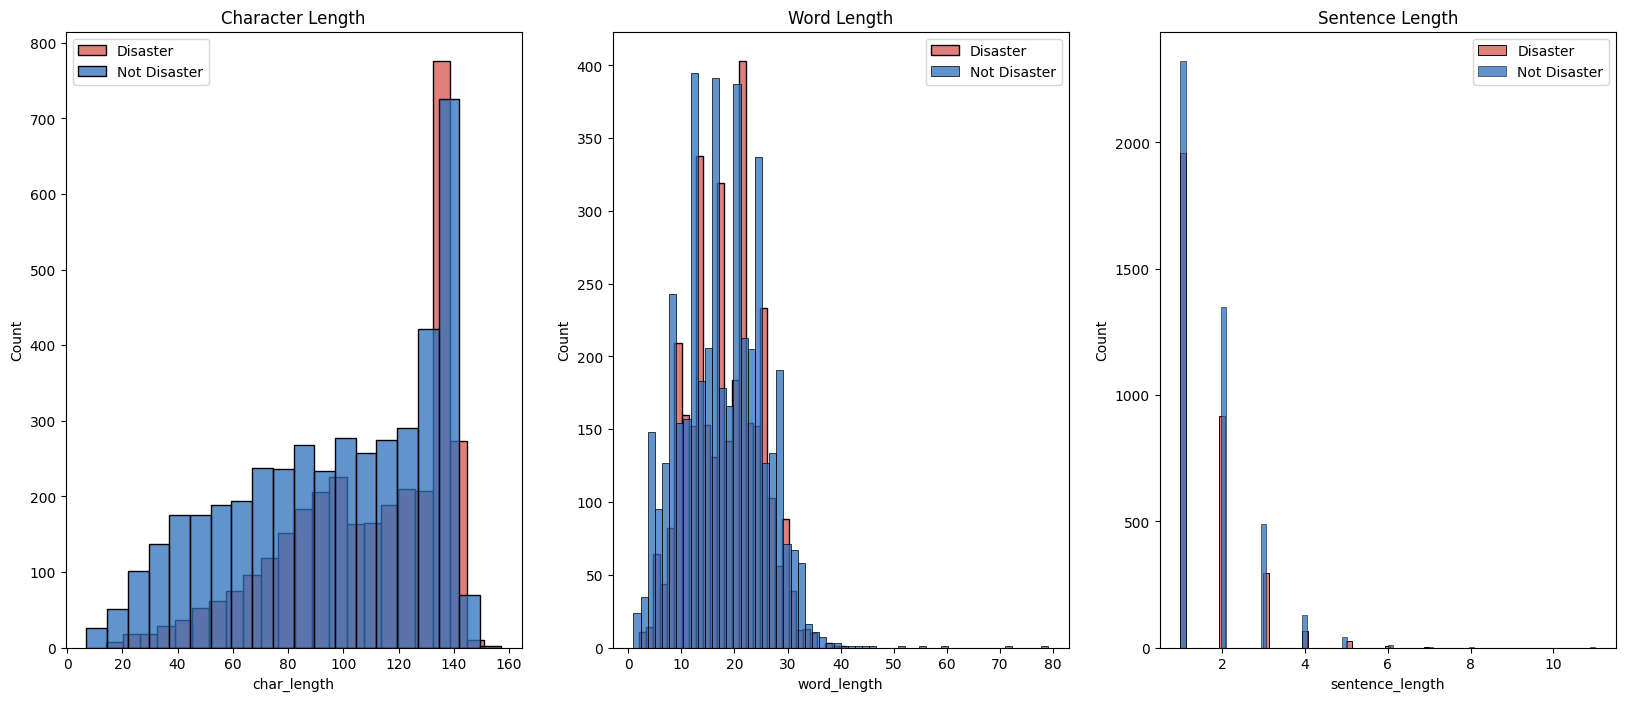

In [9]:
plot_cols = ["char_length", "word_length", "sentence_length"]
plot_titles = ["Character Length", "Word Length", "Sentence Length"]

color = [sns.xkcd_rgb["medium blue"], sns.xkcd_rgb["pale red"]]
plt.figure(figsize=(20, 8))


for counter, i in enumerate([0, 1, 2]):
    plt.subplot(1, 3, counter + 1)
    sns.histplot(train_df[train_df.target == 1][plot_cols[i]], 
                 label="Disaster", color=color[1]).set_title(plot_titles[i])
    sns.histplot(train_df[train_df.target == 0][plot_cols[i]],
                 label="Not Disaster", color=color[0])
    plt.legend()

Let us now plot a graph and take a look at the most common stopwords in the text. To run the next code, you need to first download nltk stopwords and you can do it by simply executing the following:

In [10]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
from nltk.corpus import stopwords

stop = set(stopwords.words("english"))
print(stop)
corpus0 = [] #Non Disaster
corpus1 = [] #Disaster

for var in train_df[train_df.target == 0].text:
    for word in nlp(var):
        corpus0.append(word.text.lower())
for var in train_df[train_df.target == 1].text:
    for word in nlp(var):
        corpus1.append(word.text.lower())

{'this', 'hasn', 'does', "wouldn't", "aren't", 'll', 'some', 'why', 'once', 'which', 'needn', 'will', 's', 'was', "that'll", 'any', 'weren', 'ma', 'isn', 'between', 'haven', 'nor', 'mightn', 'again', 'very', 'their', "it's", 'them', 'if', "you'll", 'until', 'how', 'above', 'they', 'after', "shouldn't", 'when', 'hers', 'herself', 'a', "won't", 'not', 'hadn', 'yourself', 'won', 've', 'have', 'of', 're', 'me', 'own', 'himself', 'we', 'those', 'further', 'am', 'on', 'whom', 'were', 'his', 'you', 'yours', "you're", 'what', 'myself', "should've", 'there', "you'd", 'its', 'theirs', 'my', "shan't", "hadn't", 'by', 'having', 'into', 'during', 'other', 'shouldn', 'she', 'out', 'did', 'has', 'because', 'been', 'being', 'at', 'under', "wasn't", 'and', "isn't", 'don', 'm', 'ourselves', "haven't", 'but', 'in', 'themselves', 'her', 'for', 'do', 'more', 'then', 'it', 'through', 'such', 'below', 'few', 'these', 'too', 'an', 'd', 'only', 'couldn', 'o', 'didn', 'all', 'most', 'ain', 'ours', 'here', 'wasn

In [12]:
def count_stopwords(corpus):
    stopwords_freq = {}
    for word in corpus:
        if word in stop:
            if word in stopwords_freq:
                stopwords_freq[word] += 1
            else:
                stopwords_freq[word] = 1
    
    stopwords = sorted(stopwords_freq.items(), key=lambda item: item[1], reverse=True)[:10]
    x, y = zip(*stopwords)
    return x, y


In [13]:
x0, y0 = count_stopwords(corpus0)
x1, y1 = count_stopwords(corpus1)

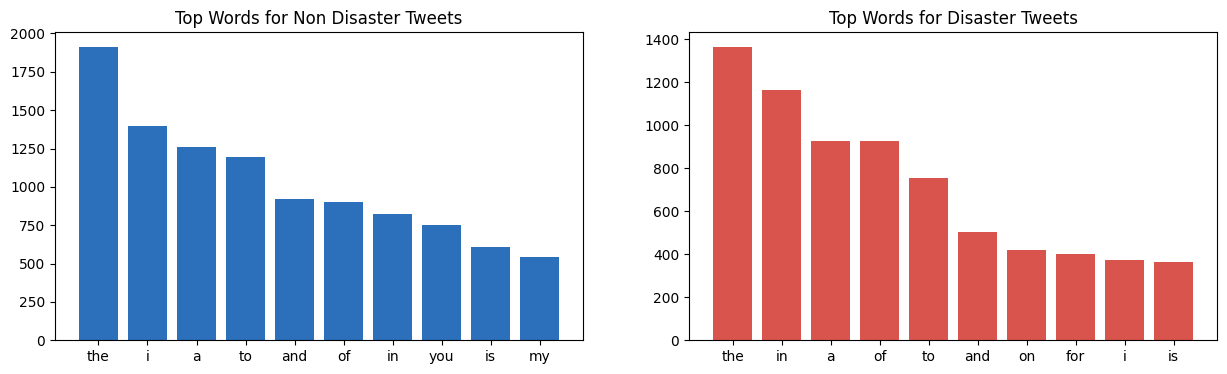

In [14]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.bar(x0, y0, color=color[0])
plt.title("Top Words for Non Disaster Tweets")
plt.subplot(1, 2, 2)
plt.bar(x1, y1, color=color[1])
plt.title("Top Words for Disaster Tweets")
plt.show()

> These graphs suggest there are many stopwords in both disaster-related and non-related tweets. We must remove them as they don’t possess any relevant information.


The next step is to analyze the stop words in the dataset in both disaster-related and non related tweets. For this, we will tokenize the words and remove all the stop words.

frozenset({'this', 'hasn', 'give', 'whereby', 'top', 'fifteen', 'll', 'name', 'why', 'once', 'un', 'which', 'needn', 'will', 's', 'nobody', "that'll", 'any', 'detail', 'seems', 'ma', 'nor', 'mightn', 'another', 'very', 'their', 'cry', 'de', 'elsewhere', 'them', 'put', 'describe', "you'll", 'amongst', 'two', 'meanwhile', 'they', 'third', 'after', 'even', 'everything', 'when', "won't", 'a', 'fill', 'not', 'co', 'hadn', 'anyway', 'everyone', 'have', 'interest', 'seeming', 're', 'me', 'himself', 'three', 'we', 'etc', 'five', 'latterly', 'those', 'whither', 'whom', 'his', 'you', 'sincere', 'herein', 'whole', 'ie', 'behind', 'myself', 'its', 'yet', 'bill', 'theirs', 'well', 'also', "hadn't", 'therefore', 'thereafter', 'having', 'beside', 'keep', 'becomes', 'out', 'she', 'has', 'because', 'however', 'being', 'under', 'at', 'enough', 'and', 'get', 'onto', 'whereafter', 'formerly', 'don', 'm', 'though', "haven't", 'her', 'serious', 'next', 'none', 'namely', 'it', 'such', 'whoever', 'mill', 'con

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'news'),
  Text(1, 0, 'amp'),
  Text(2, 0, 'disaster'),
  Text(3, 0, 'california'),
  Text(4, 0, 'suicide'),
  Text(5, 0, 'police'),
  Text(6, 0, 'people'),
  Text(7, 0, '2'),
  Text(8, 0, 'killed'),
  Text(9, 0, 'like')])

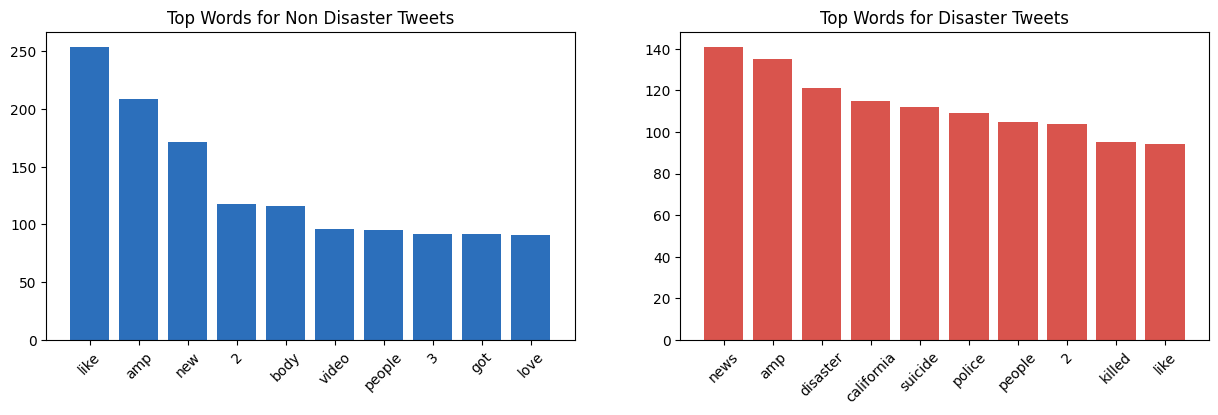

In [15]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from collections import Counter

stop = ENGLISH_STOP_WORDS.union(stop)  #combine stopwords from different sources
print(stop)

def remove_url(text):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split())

corpus0 = [] #Non Disaster
for var in train_df[train_df.target == 0].text:
    for word in nlp(remove_url(var)):
        corpus0.append(word.text.lower())

corpus0 = list(filter(lambda x: x not in stop, corpus0)) #use filter to unselect stopwords

corpus1 = [] #Disaster
for var in train_df[train_df.target == 1].text:
    for word in nlp(remove_url(var)):
        corpus1.append(word.text.lower())

corpus1 = list(filter(lambda x: x not in stop, corpus1))

counter0 = Counter(corpus0)
counter1 = Counter(corpus1)

df0 = pd.DataFrame(counter0.most_common(10), columns=["Word", "Count"])
df1 = pd.DataFrame(counter1.most_common(10), columns=["Word", "Count"])

plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.bar(df0["Word"], df0["Count"], color=color[0])
plt.title("Top Words for Non Disaster Tweets")
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
plt.bar(df1["Word"], df1["Count"], color=color[1])
plt.title("Top Words for Disaster Tweets")
plt.xticks(rotation=45)


Another popular method of exploring textual data is plotting word clouds. They display words in varying sizes and colors, with the size typically indicating the frequency or importance of each word within the given text. Word clouds are commonly used to provide a quick visual summary of the most prominent words in a document, making it easier to identify key themes, topics, or trends at a glance.Let us plot a few word clouds for the hashtags used in the tweets.

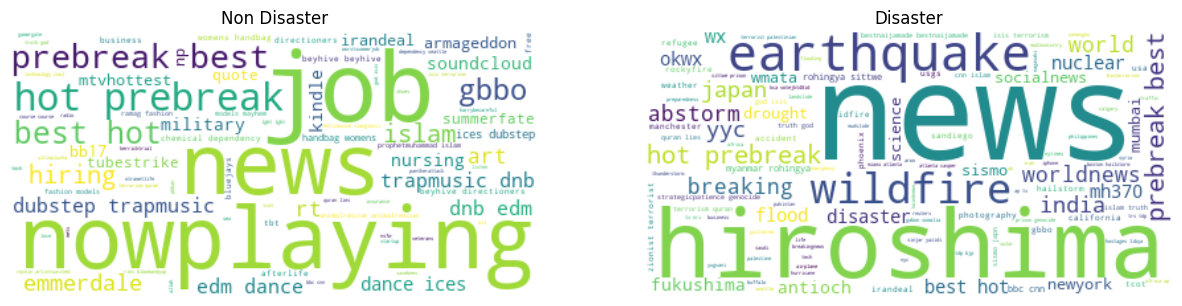

In [16]:
import string

punctuation = string.punctuation
def clean(word):
    for p in punctuation:
        word = word.replace(p, "")
    return word


from wordcloud import WordCloud


def wc_hash(target):
    hashtag = [clean(w[1:].lower()) for var in train_df[train_df.target == target].text
               for w in var.split() if "#" in w and w[0] == "#"]
    hashtag = ' '.join(hashtag)
    mycloud = WordCloud(background_color="white", stopwords=stop).generate(hashtag)

    plt.subplot(1, 2, target + 1)
    plt.imshow(mycloud, interpolation="bilinear")
    plt.axis("off")

plt.figure(figsize=(15, 4))
wc_hash(0)
plt.title("Non Disaster")
wc_hash(1)
plt.title("Disaster")
plt.show()


## Feature Extraction


Let us now work on extracting the features from the training data that will help our NLP language model to classify the tweet seamlessly.

+ polarity - range of [-1,1] where 1 denotes positivity and -1 denotes negativity

+ subjectivity - range of [0,1] where 1 denotes personal opinions and 0 denotes factual info

+ exclaimation_num - number of exclamation marks in tweet

+ questionmark_num - number of question marks in tweet

+ url_num - number of urls in tweet

+ hash_num - number of hashtags (#) in tweet

+ mention_num - number of mentions (@) in tweet

+ contraction_num - number of contractions (e.g I'm, we're, we've)

In [17]:
## Feature Extraction
from textblob import TextBlob


train_df["polarity"] = [TextBlob(var).sentiment.polarity for var in train_df.text]
train_df["subjectivity"] = [TextBlob(var).sentiment.subjectivity for var in train_df.text]

train_df["exclaimation_num"] = [var.count("!") for var in train_df.text]
train_df["questionmark_num"] = [var.count("?") for var in train_df.text]


def count_url_hashtag_mention(text):
    urls_num = len(re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', text))
    word_tokens = text.split()
    hash_num = len([word for word in word_tokens if word[0] == "#" and word.count("#") == 1])
    mention_num = len([word for word in word_tokens if word[0] == "@" and word.count("@") == 1])
    return urls_num, hash_num, mention_num

url_num, hash_num, mention_num = zip(*train_df.text.apply(count_url_hashtag_mention))
train_df = train_df.assign(url_num = url_num, hash_num = hash_num, mention_num = mention_num)

train_df.head()

,id,keyword,location,text,target,char_length,word_length,sentence_length,polarity,subjectivity,exclaimation_num,questionmark_num,url_num,hash_num,mention_num
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,14,1,0.00000,0.0000,0,0,0,1,0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,8,2,0.10000,0.4000,0,0,0,0,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,25,2,-0.01875,0.3875,0,0,0,0,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,9,1,0.00000,0.0000,0,0,0,1,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,18,1,0.00000,0.0000,0,0,0,2,0


In [18]:
#Count number of contractions in the text
contractions = ["'t ", "'d ", "'s ", "'re ", "'m ", "'ve ", "'ll "]        
train_df["contraction_num"] = [sum([var.count(cont) for cont in contractions]) for var in train_df.text]


In [19]:
train_df.head()

,id,keyword,location,text,target,char_length,word_length,sentence_length,polarity,subjectivity,exclaimation_num,questionmark_num,url_num,hash_num,mention_num,contraction_num
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,14,1,0.00000,0.0000,0,0,0,1,0,0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,8,2,0.10000,0.4000,0,0,0,0,0,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,25,2,-0.01875,0.3875,0,0,0,0,0,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,9,1,0.00000,0.0000,0,0,0,1,0,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,18,1,0.00000,0.0000,0,0,0,2,0,0


## Data Cleaning

Data cleaning plays a pivotal role in Natural Language Processing (NLP) as it lays the foundation for accurate and meaningful linguistic analysis. Clean and well-structured text data ensures that NLP language models can effectively extract valuable insights, patterns, and semantics from text. By removing noise, such as punctuation, numerical values, or irrelevant characters, data cleaning enhances the quality of the input data, enabling NLP algorithms to better understand the language's nuances. Additionally, NLP techniques like stemming, lemmatization, and handling typos further refine the text, making it easier for models to recognize root words and context. Ultimately, rigorous data cleaning is essential for NLP tasks to ensure that the subsequent processing steps, such as modeling, yield robust and reliable results, which are crucial in applications ranging from sentiment analysis and chatbots to information retrieval and language translation. So, let us implement data cleaning techniques for our dataset.

> First, we will replace the missing values in the Keyword variable, then remove contractions, emojis, specific punctuations, and URLs from the tweets

In [20]:
train_df.keyword.value_counts()

#Replace NaN values with "None"
train_df.keyword.fillna("None", inplace=True)

C:\Users\msi\AppData\Local\Temp\ipykernel_18228\2614881408.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df.keyword.fillna("None", inplace=True)


In [21]:
train_df.keyword.value_counts()

keyword
None                     61
fatalities               45
deluge                   42
armageddon               42
sinking                  41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: count, Length: 222, dtype: int64

In [22]:
train_df.head()

,id,keyword,location,text,target,char_length,word_length,sentence_length,polarity,subjectivity,exclaimation_num,questionmark_num,url_num,hash_num,mention_num,contraction_num
0,1,None,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,14,1,0.00000,0.0000,0,0,0,1,0,0
1,4,None,NaN,Forest fire near La Ronge Sask. Canada,1,38,8,2,0.10000,0.4000,0,0,0,0,0,0
2,5,None,NaN,All residents asked to 'shelter in place' are ...,1,133,25,2,-0.01875,0.3875,0,0,0,0,0,0
3,6,None,NaN,"13,000 people receive #wildfires evacuation or...",1,65,9,1,0.00000,0.0000,0,0,0,1,0,0
4,7,None,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,18,1,0.00000,0.0000,0,0,0,2,0,0


In [23]:
#Function for expanding most common contractions
def decontraction(phrase):
    
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    #general
    phrase = re.sub(r"n\'t ", " not", phrase)
    phrase = re.sub(r"\'re ", " are", phrase)
    phrase = re.sub(r"\'s ", " is", phrase)
    phrase = re.sub(r"\'d ", " would", phrase)
    phrase = re.sub(r"\'ll ", " will", phrase)
    phrase = re.sub(r"\'t ", " not", phrase)
    phrase = re.sub(r"\'ve ", " have", phrase)
    phrase = re.sub(r"\'m ", " am", phrase)
    return phrase

train_df.text = [decontraction(var) for var in train_df.text]

#Function to remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

print(remove_emoji("Hello, I am a happy person 😊"))

train_df.text = train_df.text.apply(lambda x: remove_emoji(x))

train_df.text = train_df.text.apply(lambda x: remove_url(x))


Hello, I am a happy person 


In [24]:
train_df.text

0       Our Deeds are the Reason of this earthquake Ma...
1                   Forest fire near La Ronge Sask Canada
2       All residents asked to shelter in place are be...
3       13 000 people receive wildfires evacuation ord...
4       Just got sent this photo from Ruby Alaska as s...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    aria ahrary TheTawniest The out of control wil...
7610              M1 94 01 04 UTC 5km S of Volcano Hawaii
7611    Police investigating after an e bike collided ...
7612    The Latest More Homes Razed by Northern Califo...
Name: text, Length: 7613, dtype: object

In [25]:
def remove_punctuation(text):
    new_punct = re.sub('\ |\!|\?', '', punctuation)
    table = str.maketrans('', '', new_punct)
    return text.translate(table)

train_df.text = train_df.text.apply(lambda x: remove_punctuation(x))

#Replace amp (&)
def replace_amp(text):
    text = re.sub(r" amp ", " and ", text)
    return text

train_df.text = train_df.text.apply(lambda x: replace_amp(x))


In [26]:
train_df.text

0       Our Deeds are the Reason of this earthquake Ma...
1                   Forest fire near La Ronge Sask Canada
2       All residents asked to shelter in place are be...
3       13 000 people receive wildfires evacuation ord...
4       Just got sent this photo from Ruby Alaska as s...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    aria ahrary TheTawniest The out of control wil...
7610              M1 94 01 04 UTC 5km S of Volcano Hawaii
7611    Police investigating after an e bike collided ...
7612    The Latest More Homes Razed by Northern Califo...
Name: text, Length: 7613, dtype: object

Next, we will implement word segmentation which is a fundamental NLP task involving the division of a continuous text into individual words or tokens, a critical step in language processing

The main goal is to ensure that words with similar meanings are grouped together. Unlike stemming, which simply cuts off prefixes or suffixes to reduce words to a root form, lemmatization considers the context and morphological analysis of the word. This means that it produces an actual word that makes sense in the language, making it more accurate and meaningful for many applications.

For example:

+ Lemmatization: "running" becomes "run", "better" becomes "good"
+ Stemming: "running" might become "run" or even "runn", and "better" could remain unchanged or incorrectly reduced.

In [27]:
from wordsegment import load, segment
load()

train_df.text = train_df.text.apply(lambda x: ' '.join(segment(x)))

In [28]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    words = nlp(text)
    return ' '.join([lemmatizer.lemmatize(w.text.lower(), pos='v') for w in words])

train_df.text = train_df.text.apply(lambda x: lemmatize(x))

In [30]:
train_df.text

0       our deeds be the reason of this earthquake may...
1                   forest fire near la ronge sask canada
2       all residents ask to shelter in place be be no...
3       13000 people receive wildfires evacuation orde...
4       just get send this photo from ruby alaska as s...
                              ...                        
7608    two giant crane hold a bridge collapse into ne...
7609    aria a hrary the tawni est the out of control ...
7610                    m1940104utc5kms of volcano hawaii
7611    police investigate after an e bike collide wit...
7612    the latest more home raze by northern californ...
Name: text, Length: 7613, dtype: object

## Move to the N-Gram Model


We now move to implementing Ngrams model for our data. 

+ N-grams  are essential elements of natural language processing (NLP) and text analysis. 

+ N-grams are contiguous sequences of N items—typically words or characters—extracted from text or speech. 

+ Bigrams, specifically 2-grams, capture adjacent word pairs, shedding light on word co-occurrence patterns in sentences, benefiting applications like sentiment analysis and language modeling. 

+ Trigrams, with N set at 3, delve even deeper, offering insights into the interplay of three consecutive words or characters, proving valuable in Natural language processing tasks demanding a broader context, such as machine translation. 

+ These N-gram techniques empower NLP models to decipher language structure, enhancing their performance in various language-related NLP tasks

In [31]:
#Ngrams
from nltk.util import ngrams


def generate_ngrams(text, n):
    doc = nlp(text)
    words = [token.text.lower() for token in doc]
    return [' '.join(ngram) for ngram in list(get_data(ngrams(words, n))) if not
            all(w in stop for w in ngram)]

def get_data(gen):
    try:
        for elem in gen:
            yield elem
    except (RuntimeError, StopIteration):
        return


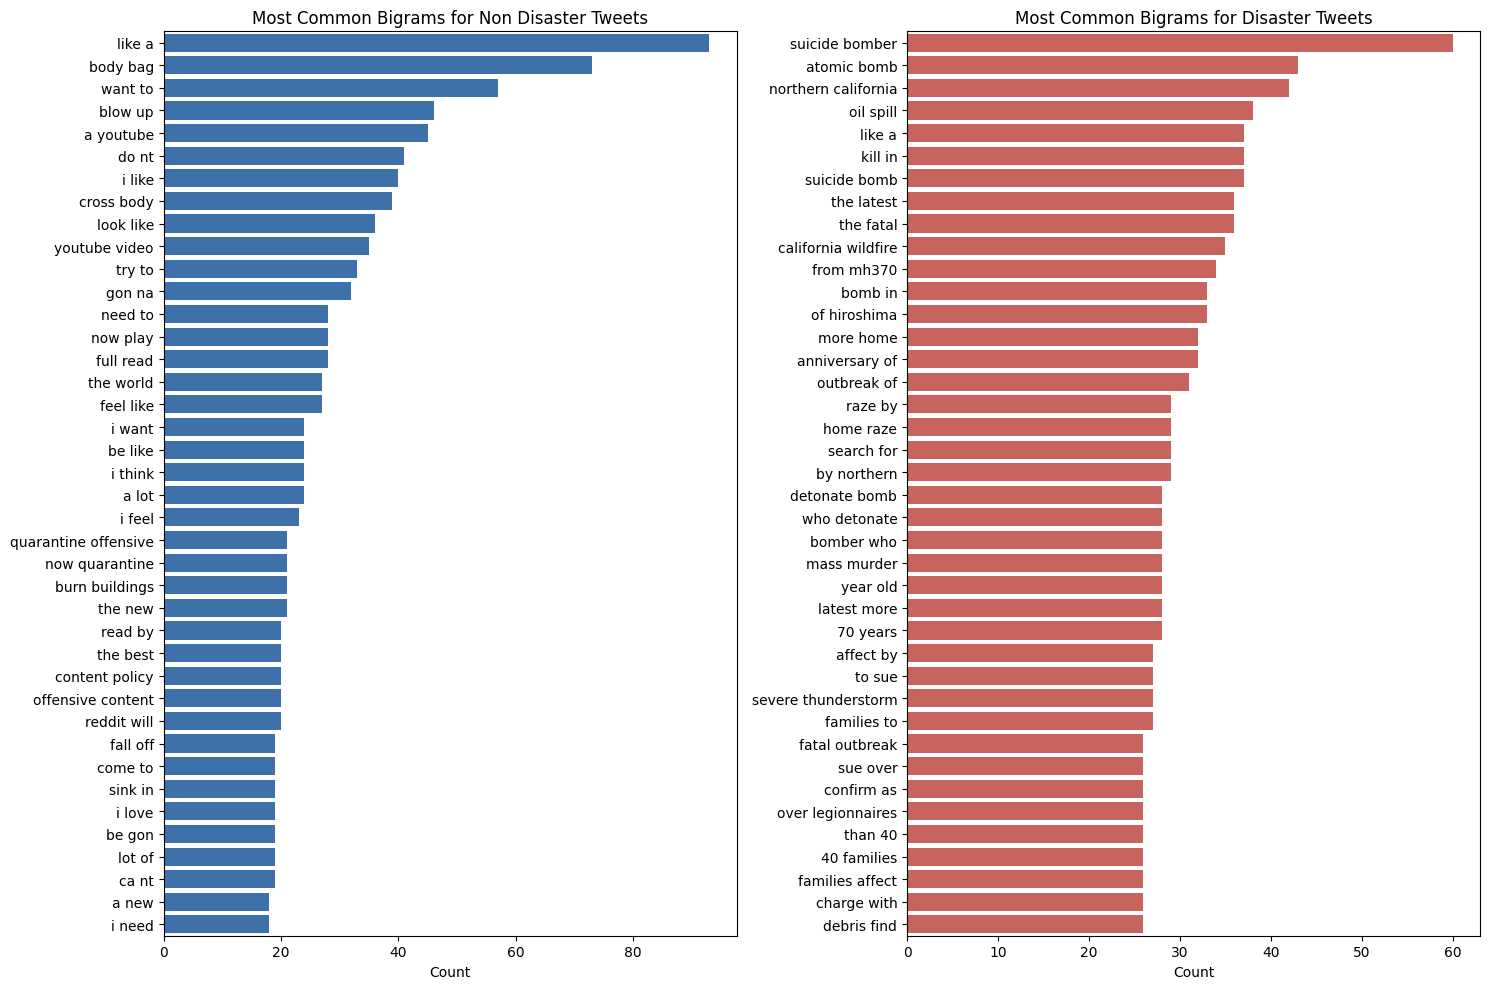

In [32]:
#Bigrams

bigrams_diaster = train_df[train_df.target == 1].text.apply(lambda x: generate_ngrams(x, 2))
bigrams_non_disaster = train_df[train_df.target == 0].text.apply(lambda x: generate_ngrams(x, 2))


bigrams_d_dict = {}

for bgs in bigrams_diaster:
    for bg in bgs:
        if bg in bigrams_d_dict:
            bigrams_d_dict[bg] += 1
        else:
            bigrams_d_dict[bg] = 1

bigrams_d_df = pd.DataFrame(bigrams_d_dict.items(), columns=["Bigrams", "Count"])

bigrams_nond_dict = {}

for bgs in bigrams_non_disaster:
    for bg in bgs:
        if bg in bigrams_nond_dict:
            bigrams_nond_dict[bg] += 1
        else:
            bigrams_nond_dict[bg] = 1

bigrams_nd_df = pd.DataFrame(bigrams_nond_dict.items(), columns=["Bigrams", "Count"])

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
sns.barplot(x='Count', y='Bigrams', data=bigrams_nd_df.sort_values('Count', ascending=False)
            .head(40), color = color[0]).set_title("Most Common Bigrams for Non Disaster Tweets")
ax = plt.gca()
ax.set_ylabel("")
plt.subplot(1, 2, 2)
sns.barplot(x='Count', y='Bigrams', data=bigrams_d_df.sort_values('Count', ascending=False)
            .head(40), color = color[1]).set_title("Most Common Bigrams for Disaster Tweets")

ax = plt.gca()
ax.set_ylabel("")
plt.tight_layout()
plt.show()


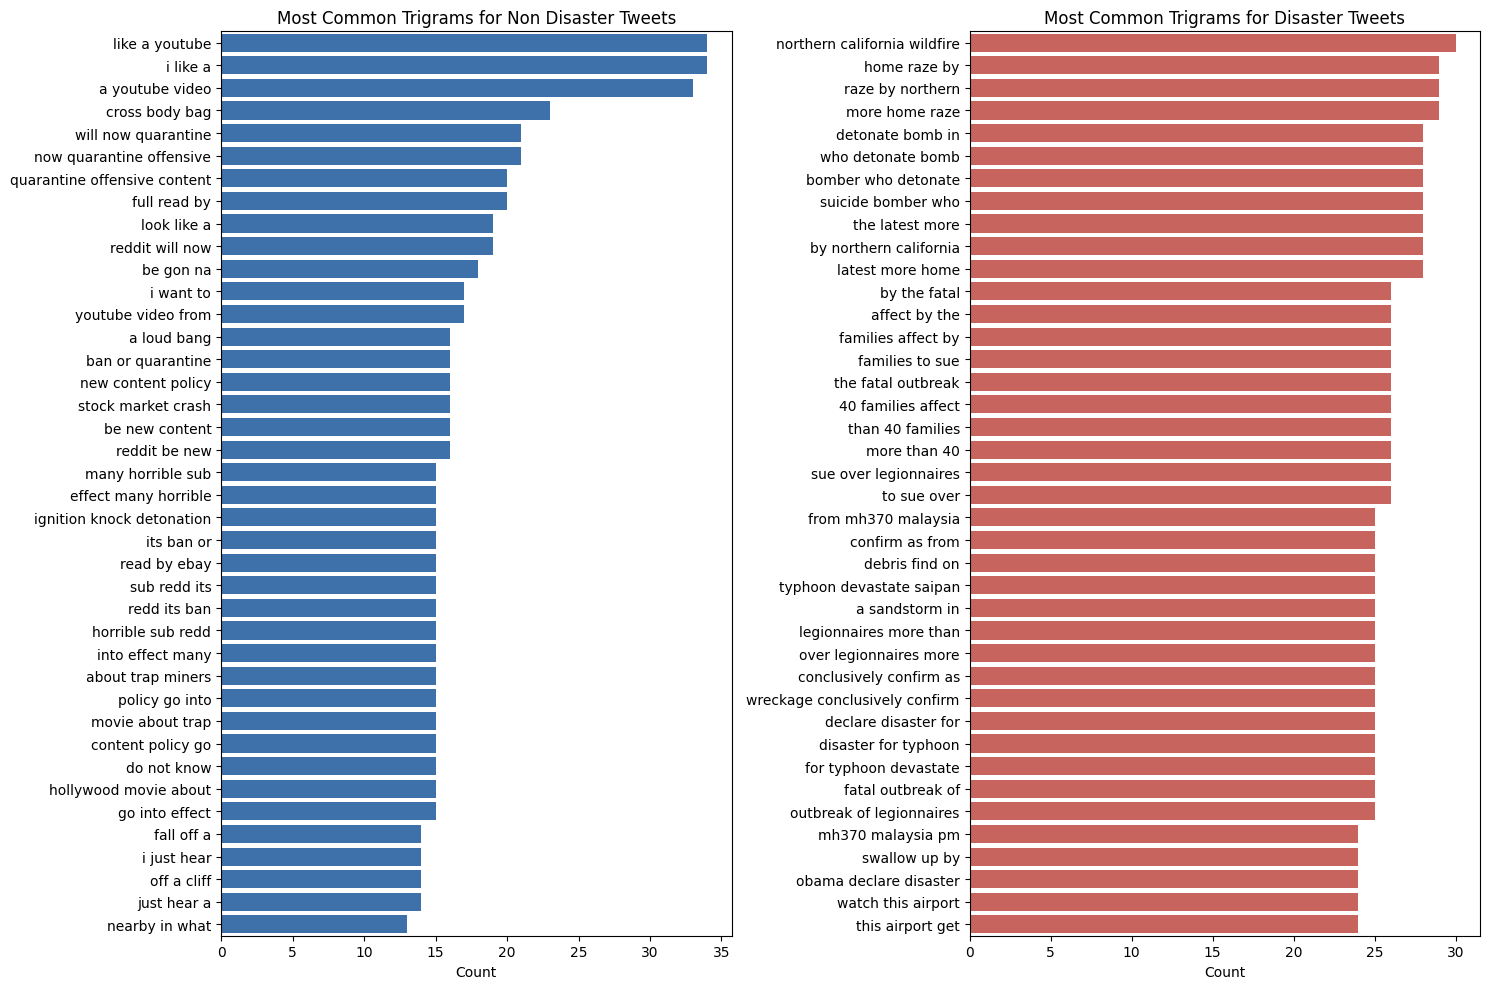

In [33]:
# Trigrams
trigrams_diaster = train_df[train_df.target == 1].text.apply(lambda x: generate_ngrams(x, 3))
trigrams_non_disaster = train_df[train_df.target == 0].text.apply(lambda x: generate_ngrams(x, 3))


trigrams_d_dict = {}

for tgs in trigrams_diaster:
    for tg in tgs:
        if tg in trigrams_d_dict:
            trigrams_d_dict[tg] += 1
        else:
            trigrams_d_dict[tg] = 1

trigrams_d_df = pd.DataFrame(trigrams_d_dict.items(), columns=["Trigrams", "Count"])

trigrams_nond_dict = {}

for tgs in trigrams_non_disaster:
    for tg in tgs:
        if tg in trigrams_nond_dict:
            trigrams_nond_dict[tg] += 1
        else:
            trigrams_nond_dict[tg] = 1

trigrams_nd_df = pd.DataFrame(trigrams_nond_dict.items(), columns=["Trigrams", "Count"])

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
sns.barplot(x='Count', y='Trigrams', data=trigrams_nd_df.sort_values('Count', ascending=False)
            .head(40), color = color[0]).set_title("Most Common Trigrams for Non Disaster Tweets")
ax = plt.gca()
ax.set_ylabel("")
plt.subplot(1, 2, 2)
sns.barplot(x='Count', y='Trigrams', data=trigrams_d_df.sort_values('Count', ascending=False)
            .head(40), color = color[1]).set_title("Most Common Trigrams for Disaster Tweets")

ax = plt.gca()
ax.set_ylabel("")
plt.tight_layout()
plt.show()

In [34]:
def remove_stopwords(text):
    word_tokens = nlp(text)
    return ' '.join([w.text.lower() for w in word_tokens if not w.text.lower() in stop])
train_df['text_nostopwords'] = train_df.text.apply(lambda x: remove_stopwords(x))
    

We will now remove a few more generic keywords from the tweets and then take a final look at the cleaned dataset.

In [35]:
import numpy as np
from PIL import Image
import requests
img_url = "https://raw.githubusercontent.com/teyang-lau/Disaster_Tweet_Classification/main/Pictures/Twitter-Logo.png"
img = Image.open(requests.get(img_url, stream=True).raw)
mask = np.array(img)
reverse = mask[..., ::-1, :]

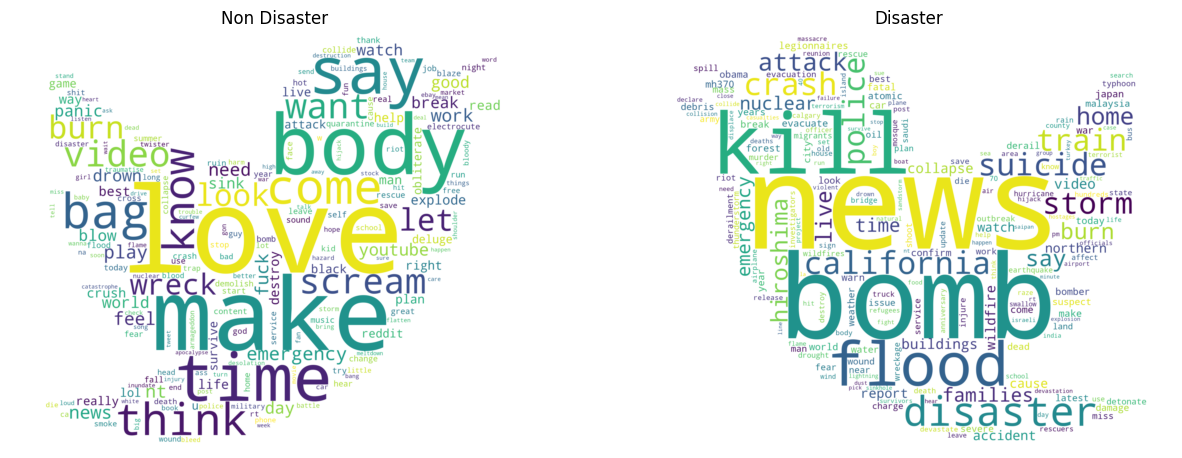

katie kat cub you already know how this shit go world series or armageddon
lemaire lee dan harmon people near meltdown comics who have free time to wait in line on sunday nights be not a representative sample 140
16tixcalgaryflamesvscol avalanche preseason 929 scotiabank saddledome
if you ever think you run out of choices in life re mbr there be that kid that have no choice but wear a suicide bomb vest
if you do tish to blight your cargo right ahead once it be not mine
electrocute yourself
thief break front window of hicksville store tole50 cell phone flee crash into
do one silver architects have win permission to demolish birmingham be natwest tower and replace it with what will be city s tallest build
fire destroy two buildings on2nd street in manchester
mins uwo on gsi completely understand because i just wake up like 15 minutes ago and i m burn
top link reddit be new content policy go into effect many horrible sub redd its ban or quarantine
come later this year the man that tattoo 

,id,keyword,location,text,target,char_length,word_length,sentence_length,polarity,subjectivity,exclaimation_num,questionmark_num,url_num,hash_num,mention_num,contraction_num
0,1,None,NaN,our deeds be the reason of this earthquake may...,1,69,14,1,0.00000,0.0000,0,0,0,1,0,0
1,4,None,NaN,forest fire near la ronge sask canada,1,38,8,2,0.10000,0.4000,0,0,0,0,0,0
2,5,None,NaN,all residents ask to shelter in place be be no...,1,133,25,2,-0.01875,0.3875,0,0,0,0,0,0
3,6,None,NaN,13000 people receive wildfires evacuation orde...,1,65,9,1,0.00000,0.0000,0,0,0,1,0,0
4,7,None,NaN,just get send this photo from ruby alaska as s...,1,88,18,1,0.00000,0.0000,0,0,0,2,0,0


In [36]:
def wc_words(target, mask=mask):
    words = [word.lower() for tweet in train_df[train_df["target"] == target].text_nostopwords for word in tweet.split()]
    words = list(filter(lambda w: w != 'like', words))
    words = list(filter(lambda w: w != 'new', words))
    words = list(filter(lambda w: w != 'people', words))

    dict = {}
    for w in words:
        if w in dict:
            dict[w] += 1
        else:
            dict[w] = 1

    my_cloud = WordCloud(background_color="white", mask=mask, stopwords=stop,
                         random_state=0).generate_from_frequencies(dict)
    
    plt.subplot(1, 2, target + 1)
    plt.imshow(my_cloud, interpolation="bilinear")
    plt.axis("off")


plt.figure(figsize=(15, 10))
wc_words(0)
plt.title("Non Disaster")
wc_words(1, reverse)
plt.title("Disaster")
plt.show()
pd.options.display.max_colwidth = 200
for t in train_df.text.sample(n = 20, random_state=0):
    print(t)

pd.reset_option('max_colwidth')
pd.reset_option('max_colwidth')
train_df.drop("text_nostopwords", axis=1, inplace=True)
train_df.head()


Finally, our training data is clean and ready. So, let us split it into subsets for training the NLP and deep learning models and take a closer look at the resulting datasets.

In [37]:
train_df.head()

,id,keyword,location,text,target,char_length,word_length,sentence_length,polarity,subjectivity,exclaimation_num,questionmark_num,url_num,hash_num,mention_num,contraction_num
0,1,None,NaN,our deeds be the reason of this earthquake may...,1,69,14,1,0.00000,0.0000,0,0,0,1,0,0
1,4,None,NaN,forest fire near la ronge sask canada,1,38,8,2,0.10000,0.4000,0,0,0,0,0,0
2,5,None,NaN,all residents ask to shelter in place be be no...,1,133,25,2,-0.01875,0.3875,0,0,0,0,0,0
3,6,None,NaN,13000 people receive wildfires evacuation orde...,1,65,9,1,0.00000,0.0000,0,0,0,1,0,0
4,7,None,NaN,just get send this photo from ruby alaska as s...,1,88,18,1,0.00000,0.0000,0,0,0,2,0,0


In [38]:
from sklearn.model_selection import train_test_split
train_df_tmp = train_df.drop(["id", "location", "keyword", "target"], axis=1)
print(train_df_tmp.head())

X_train, X_val, y_train, y_val = train_test_split(train_df_tmp,
                                                    train_df[["target"]], 
                                                    test_size=.2, 
                                                    stratify=train_df[["target"]],
                                                    random_state=0)
# X_train_text = X_train["text"]
# X_val_text = X_test["text"]

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

X_train_text = X_train['text']
X_val_text = X_val['text']
print("Train Class Proportion:\n", y_train['target'].value_counts() / len(y_train) * 100)
print("\nValidation Class Proportion:\n", y_val['target'].value_counts() / len(y_val) * 100)


                                                text  char_length  \
0  our deeds be the reason of this earthquake may...           69   
1              forest fire near la ronge sask canada           38   
2  all residents ask to shelter in place be be no...          133   
3  13000 people receive wildfires evacuation orde...           65   
4  just get send this photo from ruby alaska as s...           88   

   word_length  sentence_length  polarity  subjectivity  exclaimation_num  \
0           14                1   0.00000        0.0000                 0   
1            8                2   0.10000        0.4000                 0   
2           25                2  -0.01875        0.3875                 0   
3            9                1   0.00000        0.0000                 0   
4           18                1   0.00000        0.0000                 0   

   questionmark_num  url_num  hash_num  mention_num  contraction_num  
0                 0        0         1            0

## Word Embeddings in NLP

### Tokenization
The code will perform the following steps:

- Splitting the Tweets: To make tweets work with our model, we start by breaking them into individual words. This helps the model understand the text better.

- Assigning Numbers: Each word is then assigned a unique number based on a vocabulary dictionary. Think of it as giving each word a special code so the model can recognize them.

- Limiting Vocabulary Size: We decide to keep only the 5000 most common words. This means if there are more than 5000 unique words, only the top 4999 will be included. Any other word will get a special code, which we call "," to show it's not in the top 5000.

- Building the Vocabulary Dictionary: We create this list of words and their codes by looking at how often words appear in the training tweets. The more often a word shows up, the higher it is on the list.

- Turning Words into Numbers: Finally, we convert the tweets into sequences of these numbers. Instead of words, the model sees the sequences as a series of codes, making it easier for the model to work with text data.

In [39]:
import tensorflow as tf

In [40]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [57]:
print(X_train_text.shape)

(6090, 50)


In [ ]:
tokenizer_1 = Tokenizer(num_words=5000, oov_token='<UNK>')
tokenizer_1.fit_on_texts(X_train_text)
X_train_text = tokenizer_1.texts_to_sequences(X_train_text)
X_val_text = tokenizer_1.texts_to_sequences(X_val_text)
print(X_train_text[:10])
print(" ")
print(X_val_text[:10])

tokenizer_1.sequences_to_texts([X_train_text[1]])

### Padding

After splitting each tweet into individual words or tokens, we end up with a list of tokens for each tweet. For example, "I love NLP" becomes ["I", "love", "NLP"]. To make things consistent and easy for our model to process, we want to represent all the tweets in the same way. Right now, they are in lists of different lengths. To fix this, we add extra tokens (in this case, 0s) to the end of each tweet's list of tokens. In simpler terms, think of it like getting all your tweets to fit in boxes of the same size. If a tweet is too long for the box, we trim it to fit. If it's too short, we add filler (0s) to make it reach the box's size. This way, the model can handle all tweets in the same way, regardless of their original length.

We decide on a maximum length that all the tokenized tweets should have. For the training set, we found that the longest tweet is 32 tokens long. However, to accommodate potential longer tweets in the validation or test sets, we set the maximum length to 50 tokens.

In [47]:
print("Train Set Max Length: ", max(len(text) for text in X_train_text))
maxlen = 50


X_train_text = pad_sequences(X_train_text, padding="post",
                             maxlen=maxlen)
X_val_text = pad_sequences(X_val_text, padding="post",
                           maxlen=maxlen)


print("X_train shape: ", X_train_text.shape)
print("X_val shape: ", X_val_text.shape)

print(X_train_text[6089])

Train Set Max Length:  50
X_train shape:  (6090, 50)
X_val shape:  (1523, 50)
[ 44   1  17  15 252  52 319 483   9   1 162   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


### Embedding Matrix

An embedding matrix is a crucial component in natural language processing (NLP) models. It's a structured table where each row corresponds to a word, and the columns represent numerical vectors capturing the word's semantic meaning. This matrix serves as the bridge between words and their vector representations, enabling language models to understand and work with textual data effectively.

We will use the Glove model to create the embedding matrix. Initially, we'll establish a dictionary where words serve as keys, and their associated embedding lists are the values. Each word's embedding dimension will be set to 200, aligning with the 200-dimensional GloVe embeddings we're utilizing. To run the code, you need to download the pretrained word vectors:  glove.twitter.27B.zip from the Stanford NLP GitHub Repository. Unzip the downloaded zip folder and extract the file glove.twitter.27b.200d.txt. Store it in a separate folder and set the path correctly.

In [58]:
# Load the whole embedding into memory
vocab_size = 6091
embeddings_index = dict()
# Add the path to the file
f = open(r"C:\Users\msi\nlp-project-disaster-classification\glove.twitter.27B\glove.twitter.27B.200d.txt",
          encoding="utf-8")

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype="float32")
    embeddings_index[word] = coefs


f.close()
print("Load %s word vectors." % len(embeddings_index))


#Create a weight matrix for words in training set
embedding_matrix = np.zeros((vocab_size, 200))

for word, i in tokenizer_1.word_index.items():
    print("word", word)
    print("i", i)
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

print("Embedding Matrix Shape: ", embedding_matrix.shape)

Load 1193515 word vectors.
Embedding Matrix Shape:  (6091, 200)


### Model Building

In [75]:
y_train = pd.DataFrame(y_train, columns=['target'])
y_val = pd.DataFrame(y_val, columns=['target'])

0       1
1       1
2       0
3       0
4       0
       ..
6085    0
6086    0
6087    1
6088    1
6089    0
Name: target, Length: 6090, dtype: int64


In [78]:
num_epochs = 20
dropout =.3
recurrent_dropout = .3
lr = 0.001
batch_size = 64
class_weight = {0: y_train['target'].value_counts()[1] / len(y_train),
                1: y_train['target'].value_counts()[0] / len(y_train)}


from keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense
from keras.layers import Flatten, GlobalMaxPooling1D, LSTM
from keras.layers import Embedding
from keras import optimizers
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Add early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.00001)


lstm_model = Sequential()
embedding_layer = Embedding(vocab_size, 200, weights=[embedding_matrix], 
                            input_length = maxlen, trainable=False)
lstm_model.add(embedding_layer)
lstm_model.add(LSTM(128, return_sequences=True, dropout=dropout,
                    recurrent_dropout=recurrent_dropout))

lstm_model.add(LSTM(128))
lstm_model.add(Dense(1, activation="sigmoid"))

adam = optimizers.Adam(learning_rate=lr)

lstm_model.compile(optimizer=adam, loss="binary_crossentropy", metrics=['acc'])
print(lstm_model.summary())

c:\Users\msi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │     1,218,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,218,200 (4.65 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,218,200 (4.65 MB)

None


In [61]:
print(ModelCheckpoint)

<class 'keras.src.callbacks.model_checkpoint.ModelCheckpoint'>


Epoch 1/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - acc: 0.4703 - loss: 0.3414 - val_acc: 0.5706 - val_loss: 0.6911
Epoch 2/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - acc: 0.5294 - loss: 0.3401 - val_acc: 0.4294 - val_loss: 0.6932
Epoch 3/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - acc: 0.4749 - loss: 0.3395 - val_acc: 0.4294 - val_loss: 0.6933
Epoch 4/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - acc: 0.5386 - loss: 0.3398 - val_acc: 0.5706 - val_loss: 0.6927
Epoch 5/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - acc: 0.4521 - loss: 0.3402 - val_acc: 0.5706 - val_loss: 0.6930
Epoch 6/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - acc: 0.5688 - loss: 0.3390 - val_acc: 0.4294 - val_loss: 0.6938
Epoch 7/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - acc: 0.5164 - loss: 0.3398 - val_acc: 0.5706 - val_loss: 0.6924
Epoch 8/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - acc: 0.4673 - loss: 0.3401 - val_acc: 0.5706 - val_loss: 0.6929
Epoch 9/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - acc: 0.548

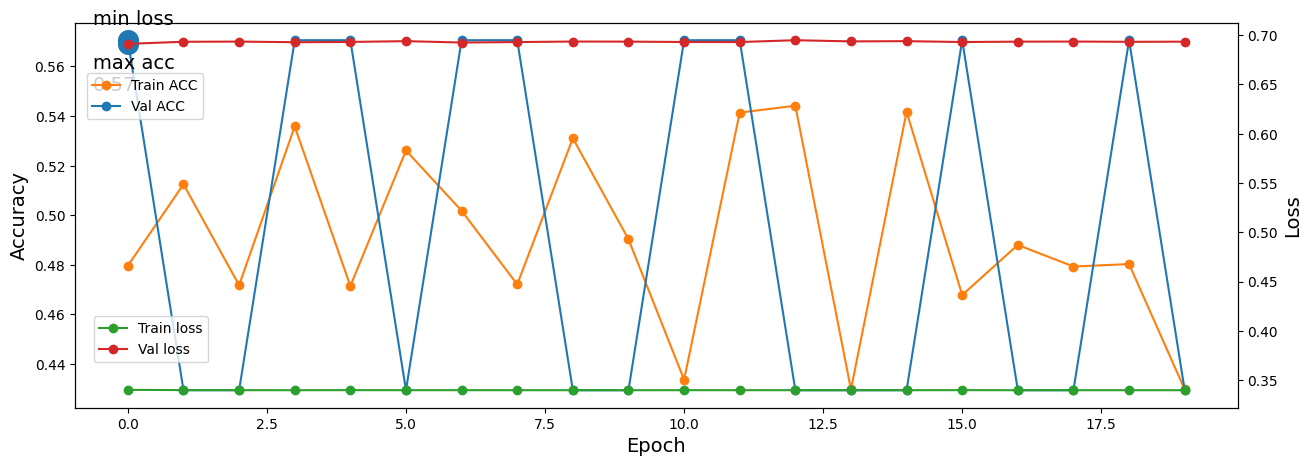

In [79]:
def plot_model_performance(history):
    plt.figure(figsize=(15, 5))
    plt.plot(range(num_epochs), history.history['acc'], '-o',
             label="Train ACC", color='#ff7f0e')
    plt.plot(range(num_epochs), history.history['val_acc'], '-o',
             label="Val ACC", color='#1f77b4')
    x = np.argmax(history.history['val_acc']); y = np.max(history.history['val_acc'])
    xdist = plt.xlim()[1] - plt.xlim()[0]; ydist=plt.ylim()[1] - plt.ylim()[0]

    plt.scatter(x, y, s=200, color='#1f77b4')
    plt.text(x - 0.03 * xdist, y - 0.13 * ydist, 'max acc\n%.2f'%y, size=14)
    plt.ylabel("Accuracy", size=14); plt.xlabel("Epoch", size=14)
    plt.legend(loc=(0.01, 0.75))

    plt2 = plt.gca().twinx()
    plt2.plot(range(num_epochs), history.history['loss'], '-o',
             label="Train loss", color='#2ca02c')
    plt2.plot(range(num_epochs), history.history['val_loss'], '-o',
             label="Val loss", color='#d62728')
    x = np.argmin(history.history['val_loss']); y = np.min(history.history['val_loss'])
    xdist = plt.xlim()[1] - plt.xlim()[0]; ydist=plt.ylim()[1] - plt.ylim()[0]

    plt.scatter(x, y, s=200, color='#1f77b4')
    plt.text(x - 0.03 * xdist, y +0.05 * ydist, 'min loss', size=14)
    plt.ylabel("Loss", size=14);
    plt.legend(loc="lower left", bbox_to_anchor=(0.01, 0.1))
    plt.show()

# Ensure y_train and y_val are 1D arrays
y_train_tmp = y_train.values.ravel()
y_val_tmp = y_val.values.ravel()

checkpoint = ModelCheckpoint('./model/lstm_model.keras', monitor='val_acc', save_best_only=True)
history = lstm_model.fit(X_train_text, y_train_tmp, batch_size=batch_size,
                         callbacks =[checkpoint], epochs=num_epochs,
                         class_weight=class_weight, validation_data=(X_val_text, y_val_tmp), verbose=1)
plot_model_performance(history)

## Testing Model Performance

So now we have our model ready and it is time to test its performance. The first step is obviously to implement all the data cleaning and feature extraction methods on the test dataset. 

In [83]:
test_df['char_len'] = test_df['text'].str.len()
test_df["word_length"] = train_df.text.apply(lambda text: len([token.text for token in nlp(text)]))
test_df["sentence_length"] = train_df.text.apply(lambda text: len(list(nlp(text).sents)))

In [84]:
test_df['polarity'] = [TextBlob(var).sentiment.polarity for var in test_df['text']]
test_df['subjectivity'] = [TextBlob(var).sentiment.subjectivity for var in test_df['text']]

In [85]:
test_df.head()

,id,keyword,location,text,char_len,word_length,sentence_length,polarity,subjectivity
0,0,NaN,NaN,Just happened a terrible car crash,34,13,1,-1.00,1.00
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",64,7,1,0.25,0.55
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",96,22,1,0.00,0.00
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,40,8,1,0.00,0.00
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,45,16,1,0.00,0.00


In [86]:
test_df['exclaimation_num'] = [var.count('!') for var in test_df['text']]
test_df['questionmark_num'] = [var.count('?') for var in test_df['text']]

In [88]:
url_num, hash_num, mention_num = zip(*test_df['text'].apply(count_url_hashtag_mention))
test_df.assign(url_num=url_num, hash_num=hash_num, mention_num=mention_num)

,id,keyword,location,text,char_len,word_length,sentence_length,polarity,subjectivity,exclaimation_num,questionmark_num,url_num,hash_num,mention_num
0,0,NaN,NaN,Just happened a terrible car crash,34,13,1,-1.00,1.000000,0,0,0,0,0
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",64,7,1,0.25,0.550000,0,0,0,1,0
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",96,22,1,0.00,0.000000,0,0,0,0,0
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,40,8,1,0.00,0.000000,0,0,0,2,0
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,45,16,1,0.00,0.000000,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÂÃÃ SAFETY FA...,58,11,1,0.00,0.000000,0,0,0,0,0
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,139,22,1,-0.20,0.333333,0,0,0,0,0
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,55,10,1,-0.20,0.300000,0,0,1,0,0
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,65,23,1,0.60,0.900000,0,0,1,0,0


In [89]:
test_df['contraction_num'] = [sum([tweet.count(cont) for cont in contractions]) for tweet in test_df['text']]

In [90]:
test_df['text'] = [decontraction(tweet) for tweet in test_df['text']]

In [91]:
test_df.text

0                      Just happened a terrible car crash
1       Heard about #earthquake is different cities, s...
2       there is a forest fire at spot pond, geese are...
3                Apocalypse lighting. #Spokane #wildfires
4           Typhoon Soudelor kills 28 in China and Taiwan
                              ...                        
3258    EARTHQUAKE SAFETY LOS ANGELES ÂÃÃ SAFETY FA...
3259    Storm in RI worse than last hurricane. My city...
3260    Green Line derailment in Chicago http://t.co/U...
3261    MEG issues Hazardous Weather Outlook (HWO) htt...
3262    #CityofCalgary has activated its Municipal Eme...
Name: text, Length: 3263, dtype: object

In [92]:
test_df['text'] = test_df['text'].apply(remove_emoji)
test_df['text'] = test_df['text'].apply(remove_url)

In [93]:
test_df['text']

0                      Just happened a terrible car crash
1       Heard about earthquake is different cities sta...
2       there is a forest fire at spot pond geese are ...
3                   Apocalypse lighting Spokane wildfires
4           Typhoon Soudelor kills 28 in China and Taiwan
                              ...                        
3258    EARTHQUAKE SAFETY LOS ANGELES SAFETY FASTENERS...
3259    Storm in RI worse than last hurricane My city ...
3260                     Green Line derailment in Chicago
3261             MEG issues Hazardous Weather Outlook HWO
3262    CityofCalgary has activated its Municipal Emer...
Name: text, Length: 3263, dtype: object

In [94]:
test_df['text'] = test_df['text'].apply(remove_punctuation)
test_df['text'] = test_df['text'].apply(replace_amp)

In [95]:
test_df['text'] = test_df['text'].apply(lambda x: ' '.join(segment(x)))
test_df['text'] = test_df['text'].apply(lambda x: lemmatize(x))

In [103]:
#Tokenization
X_test_text = test_df['text']
tokenizer_1.fit_on_texts(X_test_text)
X_test_text = tokenizer_1.texts_to_sequences(X_test_text)


In [104]:
print(X_test_text)

[[33, 163, 4, 973, 169, 74], [149, 52, 334, 2, 1500, 1082, 566, 794, 453], [65, 2, 4, 134, 30, 24, 795, 1501, 3658, 2, 3659, 974, 3, 611, 9, 47, 15, 188, 109, 36], [313, 454, 3660, 335], [1083, 3661, 6, 455, 8, 1502], [26, 2, 2440, 11, 2, 41, 334], [50, 49, 727, 93, 138, 45, 127, 105, 2441, 17, 519, 3662], [871, 51, 2, 10], [55, 4, 1084, 728], [170, 94], [3663, 17, 15, 25, 975], [34, 1503, 1503, 17, 15, 17, 19], [34, 17, 15, 206, 37, 19], [55, 48], [872], [1856, 2442, 233, 2, 4, 234, 520, 38, 30, 83, 32, 24, 1856, 2, 2442, 233], [257, 295, 3664, 1857, 27, 10, 976, 796, 13, 1858, 612], [3665, 12, 3666, 6, 456, 3667, 3668, 2, 3669, 671, 214, 873, 672, 612], [336, 337, 32, 2443], [3670, 1859, 2444, 16, 3671, 3672, 338, 612, 874, 3673, 338, 612], [1860, 100, 612, 3674, 3675, 8, 3676, 673], [3677, 612, 18, 3678, 2445, 58, 3679], [15, 4, 2446, 521, 61, 27, 68, 522, 339, 8, 192, 20, 143, 1861, 11, 2, 41, 3680, 416, 39, 2, 52, 3681, 3, 3682, 3683], [1862, 1085, 164, 28, 189, 214, 1504, 3684, 1

In [105]:
#Padding
test_df_text = pad_sequences(X_test_text, padding='post', maxlen=50)
print("X_test shape: ", test_df_text.shape)

X_test shape:  (3263, 50)


[ 33 163   4 973 169  74   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


In [112]:
lstm_model.load_weights("./model/lstm_model.keras")

In [113]:
submission = test_df.copy()[['id']]

In [114]:
predict_x = lstm_model.predict(test_df_text)
submission['target'] = np.argmax(predict_x, axis=1)
submission.to_csv("submission.csv", index=False)
display(submission.head())

102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step


,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
